In [1]:
import pandas as pd
pipiens = pd.read_csv('pipienslist.csv')
pipiens

,county,trap,yyyy,mm,dd,satdens,presatdens,T,preT,P,preP,irrnotrice,rice,deveice,potsat,noirr,numpertraps
0,Fresno,CO2,2007,2,22,0.180441,0.174539,10.437263,6.553006,2.357679,0.489653,0.413470,0.000000,0.090985,0.091222,0.404323,0.000000
1,Placer,NJLT,2007,2,21,0.085970,0.077260,10.660798,7.263294,5.620092,0.494954,0.063429,0.245176,0.228809,0.017188,0.445398,0.000000
2,Sacramento,CO2,2007,2,6,0.116439,0.114701,10.496330,6.676546,4.531967,0.283258,0.286321,0.030695,0.225782,0.058526,0.398676,0.333333
3,Sacramento,CO2,2007,2,14,0.116340,0.114597,10.496416,6.678695,4.538046,0.283587,0.285714,0.030654,0.226999,0.058537,0.398096,1.090910
4,Sacramento,GRVD,2007,2,4,0.095130,0.087670,10.546784,6.589638,3.929961,0.212650,0.213774,0.002327,0.544237,0.040849,0.198812,0.705882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,Yolo,GRVD,2015,12,14,0.092956,0.078160,8.272561,10.745507,2.019449,1.219727,0.383511,0.037966,0.279707,0.038741,0.260075,2.428570
21888,Yolo,GRVD,2015,12,22,0.092972,0.078182,8.272561,10.745507,2.019449,1.219727,0.332902,0.044156,0.320660,0.014423,0.287860,0.500000
21889,Yolo,NJLT,2015,12,7,0.092956,0.078160,8.272561,10.745507,2.019449,1.219727,0.383511,0.037966,0.279707,0.038741,0.260075,1.571430
21890,Yolo,NJLT,2015,12,14,0.092956,0.078160,8.272561,10.745507,2.019449,1.219727,0.383511,0.037966,0.279707,0.038741,0.260075,0.285714


In [2]:
pipiens.describe()

,yyyy,mm,dd,satdens,presatdens,T,preT,P,preP,irrnotrice,rice,deveice,potsat,noirr,numpertraps
count,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,21892.000000,2.189200e+04,21892.000000
mean,2011.088663,7.036360,15.835648,0.084003,0.083544,20.686428,20.086443,0.326227,0.409346,0.380218,0.025955,0.306102,0.035333,2.523925e-01,11.434288
std,2.559197,2.247947,8.723944,0.077339,0.074786,6.314197,6.587705,0.744094,0.883689,0.224638,0.065844,0.198331,0.046578,1.619264e-01,53.525738
min,2007.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000180,0.000000,1.490000e-07,0.000000
25%,2009.000000,5.000000,8.000000,0.043602,0.044710,17.626669,16.191373,0.000000,0.000000,0.205132,0.000000,0.160307,0.007216,1.451957e-01,0.000000
50%,2011.000000,7.000000,16.000000,0.058652,0.060486,22.350990,21.895338,0.006060,0.015144,0.383511,0.000350,0.255605,0.020974,2.139810e-01,1.000000
75%,2013.000000,9.000000,23.000000,0.094218,0.094187,25.092087,24.942991,0.296135,0.363303,0.550307,0.012310,0.426685,0.047357,3.101465e-01,7.941995
max,2015.000000,12.000000,31.000000,0.902978,0.911500,30.904355,30.888064,9.647810,10.052903,0.953635,0.856449,0.999638,0.615725,9.827710e-01,2697.330000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000240761C0F40>]],
      dtype=object)

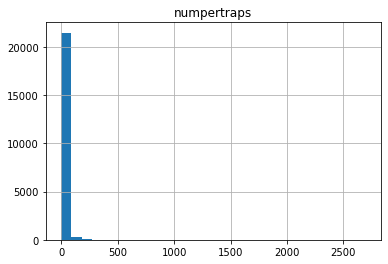

In [3]:
pipiens.hist('numpertraps',bins = 30)

### Data split and preprocess
From the area hist  plot, you can see that the num per trap are of the ranges from 0 ~ 300 but the data distribution is highly non uniform.
To compensate, predict the log of the num per trap instead of num itself

In [4]:
#Data split and preprocess
import numpy as np
pipiens.county.replace(('Shasta','Tehama','Butte','Glenn','Colusa','Yuba','Sutter','Placer','Yolo','Sacramento',
                      'Solano','Amador','Calaveras','Contra_Costa','Alameda','San_Joaquin','Stanislaus','Merced',
                      'Madera','Fresno','Kings','Tulare','Kern'),(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23),inplace=True)
pipiens.trap.replace(('NJLT', 'GRVD', 'CO2'),(1, 2, 3),inplace=True)
pipiens['log_num'] = np.log10(pipiens['numpertraps']+1) # Plus 1 to avoid inf
pipiens

,county,trap,yyyy,mm,dd,satdens,presatdens,T,preT,P,preP,irrnotrice,rice,deveice,potsat,noirr,numpertraps,log_num
0,20,3,2007,2,22,0.180441,0.174539,10.437263,6.553006,2.357679,0.489653,0.413470,0.000000,0.090985,0.091222,0.404323,0.000000,0.000000
1,8,1,2007,2,21,0.085970,0.077260,10.660798,7.263294,5.620092,0.494954,0.063429,0.245176,0.228809,0.017188,0.445398,0.000000,0.000000
2,10,3,2007,2,6,0.116439,0.114701,10.496330,6.676546,4.531967,0.283258,0.286321,0.030695,0.225782,0.058526,0.398676,0.333333,0.124939
3,10,3,2007,2,14,0.116340,0.114597,10.496416,6.678695,4.538046,0.283587,0.285714,0.030654,0.226999,0.058537,0.398096,1.090910,0.320335
4,10,2,2007,2,4,0.095130,0.087670,10.546784,6.589638,3.929961,0.212650,0.213774,0.002327,0.544237,0.040849,0.198812,0.705882,0.231949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,9,2,2015,12,14,0.092956,0.078160,8.272561,10.745507,2.019449,1.219727,0.383511,0.037966,0.279707,0.038741,0.260075,2.428570,0.535113
21888,9,2,2015,12,22,0.092972,0.078182,8.272561,10.745507,2.019449,1.219727,0.332902,0.044156,0.320660,0.014423,0.287860,0.500000,0.176091
21889,9,1,2015,12,7,0.092956,0.078160,8.272561,10.745507,2.019449,1.219727,0.383511,0.037966,0.279707,0.038741,0.260075,1.571430,0.410175
21890,9,1,2015,12,14,0.092956,0.078160,8.272561,10.745507,2.019449,1.219727,0.383511,0.037966,0.279707,0.038741,0.260075,0.285714,0.109144


In [5]:
# Split the data
from sklearn.model_selection import train_test_split
X_data=pipiens.drop(['numpertraps','log_num'],axis=1).values
y_data=pipiens['log_num'].values
y_data = y_data.reshape(-1,1)
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size, random_state=11)

### Regression with random forest model
Here I use the random forest model to do the regression, after several attempts, min_samples_leaf=1 has no significant overfitting/underfitting.

In [6]:
### A random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import tree
import matplotlib.pyplot as plt
regr = RandomForestRegressor(min_samples_leaf=1) 
regr.fit(X_train,np.ravel(y_train))
y_predrf = regr.predict(X_test)
# Show the predicted error in RMSE
print("RMSE for rf regression:",np.sqrt(np.mean((y_test-y_predrf)**2)))
# See how any tree from this forest looks 
estimator = regr.estimators_
print(len(estimator))

RMSE for rf regression: 0.7921411445107736
100


In [7]:
#Show tree
#plt.figure()
#tree.plot_tree(estimator[1],
               #filled = True);
#plt.show

<function matplotlib.pyplot.show(*args, **kw)>

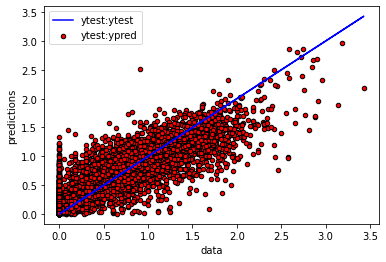

In [8]:
## Visualize fit
plt.plot(y_test,y_test,c="blue", label="ytest:ytest")
plt.scatter(y_test, y_predrf, s=20, edgecolor="black",c="red", label="ytest:ypred")
plt.xlabel("data")
plt.ylabel("predictions")
plt.legend()
plt.show

RMSE for rf regression: 0.8132562249823735


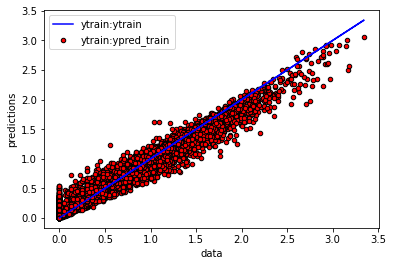

In [9]:
#Visualize fit
plt.plot(y_train,y_train,c="blue", label="ytrain:ytrain")
y_predtrain = regr.predict(X_train)
plt.scatter(y_train, y_predtrain, s=20, edgecolor="black",c="red", label="ytrain:ypred_train")
plt.xlabel("data")
plt.ylabel("predictions")
plt.legend()
plt.show
print("RMSE for rf regression:",np.sqrt(np.mean((y_train-y_predtrain)**2)))

We can see that the scatterplot of prediction using test data is similar in bias and overall RMSE the prediction using training data. So we take this model setup as acceptable in the following discussions.

Feature ranking:
1. county (0.372154)
2. trap (0.086734)
3. T (0.086684)
4. irrnotrice (0.061061)
5. deveice (0.056227)
6. noirr (0.049053)
7. preT (0.048195)
8. potsat (0.044244)
9. yyyy (0.038105)
10. rice (0.030142)
11. satdens (0.028816)
12. dd (0.026571)
13. presatdens (0.025315)
14. mm (0.019363)
15. P (0.014111)
16. preP (0.013223)


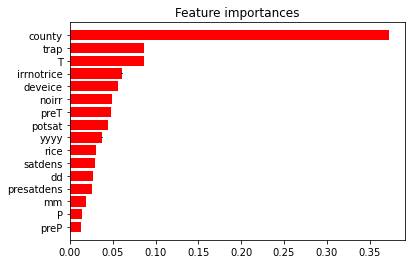

In [10]:
## Prediction Feature Ranking
# importance is calculated for each feature (predictor)

importances = regr.feature_importances_

std = np.std([tree.feature_importances_ for tree in regr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, pipiens.drop(['numpertraps','log_num'],axis=1).columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest

plt.figure()
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.yticks(range(X_train.shape[1]), pipiens.drop(['numpertraps','log_num'],axis=1).columns[indices])
plt.ylim([-1, X_train.shape[1]])
plt.gca().invert_yaxis()
plt.show()

In [11]:
# REC curve
def rec(m,n,tol):
    if type(m)!='numpy.ndarray':
        m=np.array(m)
    if type(n)!='numpy.ndarray':
        n=np.array(n)
    l=m.size
    percent = 0
    for i in range(l):
        if np.abs(10**m[i]-10**n[i])<=tol:
            percent+=1
    return 100*(percent/l)

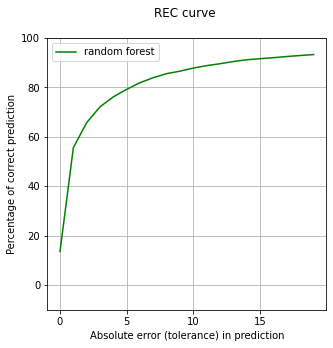

In [12]:
#### Plot REC curves of the linear model, the SVR model, and the random forest model together to compare
tol_max = 20
rec_rf=[]

for i in range(tol_max):
    rec_rf.append(rec(y_predrf,y_test,i))
plt.figure(figsize=(5,5))
plt.title("REC curve \n")
plt.xlabel("Absolute error (tolerance) in prediction")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i*5 for i in range(tol_max+1)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_rf,'g',label='random forest')
plt.legend()
plt.show()

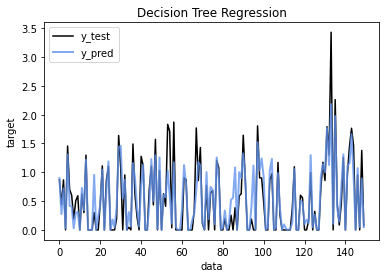

In [13]:
# Plot the results for sample tests
plt.figure()
X=np.arange(y_test.shape[0])
plt.plot(X[0:150], y_test[0:150], color="black",
            label="y_test")
plt.plot(X[0:150], y_predrf[0:150], color="cornflowerblue",
         label="y_pred", linewidth=2,alpha=0.8)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Random forest regression with selected features
Above we identified the feature importance, and I will discard the features that has least importance (rice, P, preP), besides, and create a random forest model again to check.

In [47]:
##Create new 'limited featured' dataset containing only those selected features
# Split the data
X_data=pipiens.drop(['P','preP','numpertraps','log_num'],axis=1).values
y_data = y_data.reshape(-1,1)
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size, random_state=11)

In [48]:
### A random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import tree
import matplotlib.pyplot as plt
regr = RandomForestRegressor(min_samples_leaf=1) 
regr.fit(X_train,np.ravel(y_train))
y_predrf = regr.predict(X_test)
# Show the predicted error in RMSE
print("RMSE for rf regression:",np.sqrt(np.mean((y_test-y_predrf)**2)))
# See how any tree from this forest looks 
estimator = regr.estimators_
print(len(estimator))

RMSE for rf regression: 0.793175971637448
100


<function matplotlib.pyplot.show(*args, **kw)>

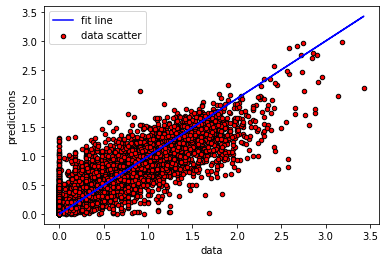

In [49]:
## Visualize fit
plt.plot(y_test,y_test,c="blue", label="fit line")
plt.scatter(y_test, y_predrf, s=20, edgecolor="black",c="red", label="data scatter")
plt.xlabel("data")
plt.ylabel("predictions")
plt.legend()
plt.show

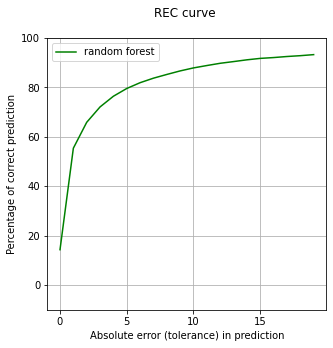

In [50]:
#### Plot REC curves of the linear model, the SVR model, and the random forest model together to compare
tol_max = 20
rec_rf=[]

for i in range(tol_max):
    rec_rf.append(rec(y_predrf,y_test,i))
plt.figure(figsize=(5,5))
plt.title("REC curve \n")
plt.xlabel("Absolute error (tolerance) in prediction")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i*5 for i in range(tol_max+1)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_rf,'g',label='random forest')
plt.legend()
plt.show()

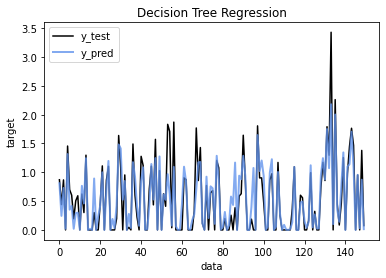

In [51]:
# Plot the results for sample tests
plt.figure()
X=np.arange(y_test.shape[0])
plt.plot(X[0:150], y_test[0:150], color="black",
            label="y_test")
plt.plot(X[0:150], y_predrf[0:150], color="cornflowerblue",
         label="y_pred", linewidth=2,alpha=0.8)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Split data according to the most important feature and 'prior information'
No significant increase in performance are identified, here we start to do another thing: since county has large feature importance, it potentially dominates the classification of data patterns (in terms of latitude-mosquito distribution relationship). So we classify the county into three groups according to their relative location within the three main watersheds (from north to south) in the Central Valley (Sacramento, San-Joaquin, Tulare, shapefiles available at https://www.tandfonline.com/doi/full/10.1080/19475683.2017.1346707), and then carry out the random forest analysis for each of the three basins. 

In [19]:
##Subgroup data to north, middle, and south parts
north=('Shasta','Tehama','Butte','Glenn','Colusa','Yuba','Sutter','Placer','Yolo','Sacramento')
middle=('Solano','Amador','Calaveras','Contra_Costa','Alameda','San_Joaquin','Stanislaus','Merced')
south=('Madera','Fresno','Kings','Tulare','Kern')
pipiensnew = pd.read_csv('finalproject/pipienslist.csv')
ndf = pd.DataFrame([])
mdf = pd.DataFrame([])
sdf = pd.DataFrame([])
for i in range(10):
    ndf=ndf.append(pipiensnew[pipiensnew['county'].str.contains(north[i])])
for i in range(8):
    mdf=mdf.append(pipiensnew[pipiensnew['county'].str.contains(middle[i])])
for i in range(5):
    sdf=sdf.append(pipiensnew[pipiensnew['county'].str.contains(south[i])])
pipiensnew.shape[0]-(ndf.shape[0]+mdf.shape[0]+sdf.shape[0]) ##Check the number of lines 
#Data split and preprocess
ndf.county.replace(north,(1, 2, 3, 4, 5, 6, 7, 8, 9, 10),inplace=True)
ndf.trap.replace(('NJLT', 'GRVD', 'CO2'),(1, 2, 3),inplace=True)
ndf['log_num'] = np.log10(ndf['numpertraps']+1) # Plus 1 to avoid inf
mdf.county.replace(middle,(1, 2, 3, 4, 5, 6, 7, 8),inplace=True)
mdf.trap.replace(('NJLT', 'GRVD', 'CO2'),(1, 2, 3),inplace=True)
mdf['log_num'] = np.log10(mdf['numpertraps']+1) # Plus 1 to avoid inf
sdf.county.replace(south,(1, 2, 3, 4, 5),inplace=True)
sdf.trap.replace(('NJLT', 'GRVD', 'CO2'),(1, 2, 3),inplace=True)
sdf['log_num'] = np.log10(sdf['numpertraps']+1) # Plus 1 to avoid inf

First we took a look at the north y data. We discovered that there are many non-zero log_num values, so we do further analysis in the ndf.

In [20]:
n_x=ndf.drop(['county','numpertraps','log_num'],axis=1).values
n_y=ndf['log_num'].values
print(np.histogram(n_y))
n_y = n_y.reshape(-1,1)
test_size = 0.3
n_xtrain, n_xtest, n_ytrain, n_ytest = train_test_split(n_x, n_y, test_size=test_size, random_state=11)

(array([2342, 1776, 1860, 1425,  811,  366,  108,   49,   30,    7],
      dtype=int64), array([0.        , 0.34310951, 0.68621901, 1.02932852, 1.37243802,
       1.71554753, 2.05865704, 2.40176654, 2.74487605, 3.08798556,
       3.43109506]))


RMSE for rf regression: 0.752441686006041


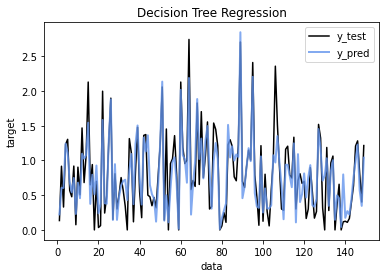

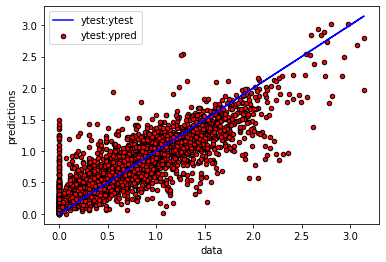

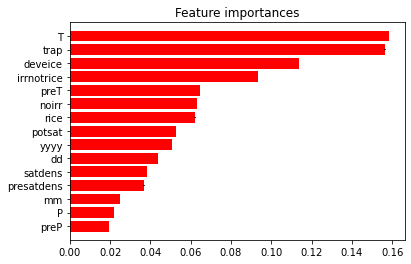

Feature ranking:
1. T (0.158220)
2. trap (0.156606)
3. deveice (0.113835)
4. irrnotrice (0.093489)
5. preT (0.064690)
6. noirr (0.063251)
7. rice (0.062035)
8. potsat (0.052803)
9. yyyy (0.050584)
10. dd (0.043617)
11. satdens (0.038098)
12. presatdens (0.036795)
13. mm (0.024828)
14. P (0.021715)
15. preP (0.019434)


In [21]:
##Random forest regression of northern counties and validation
regr = RandomForestRegressor(min_samples_leaf=1) 
regr.fit(n_xtrain,np.ravel(n_ytrain))
n_pred = regr.predict(n_xtest)
print("RMSE for rf regression:",np.sqrt(np.mean((n_ytest-n_pred)**2)))
# Plot the results for sample tests
plt.figure()
X=np.arange(n_ytest.shape[0])
plt.plot(X[1:150], n_ytest[1:150], color="black",
            label="y_test")
plt.plot(X[1:150], n_pred[1:150], color="cornflowerblue",
         label="y_pred", linewidth=2,alpha=0.8)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()
#Visualize fit
plt.plot(n_ytest,n_ytest,c="blue", label="ytest:ytest")
plt.scatter(n_ytest, n_pred, s=20, edgecolor="black",c="red", label="ytest:ypred")
plt.xlabel("data")
plt.ylabel("predictions")
plt.legend()
plt.show
#Feature ranking for southern counties
## Prediction Feature Ranking
# importance is calculated for each feature (predictor)

importances = regr.feature_importances_

std = np.std([tree.feature_importances_ for tree in regr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the impurity-based feature importances of the forest

plt.figure()
plt.title("Feature importances")
plt.barh(range(n_xtrain.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.yticks(range(n_xtrain.shape[1]), ndf.drop(['county','numpertraps','log_num'],axis=1).columns[indices])
plt.ylim([-1, n_xtrain.shape[1]])
plt.gca().invert_yaxis()
plt.show()
# Print the feature ranking
print("Feature ranking:")

for f in range(n_xtrain.shape[1]):
    print("%d. %s (%f)" % (f + 1, ndf.drop(['county','numpertraps','log_num'],axis=1).columns[indices[f]], importances[indices[f]]))

RMSE is smaller than the three-region together RMSE, indicating that our grouping is potentially useful, the scatterplot share similar bias and spread as the three-region together one. Feature ranking are overall similar.

Then we took another look at the middle y data. We discovered that there are many non-zero log_num values, so we do further analysis in the mdf.

In [22]:
m_x=mdf.drop(['county','numpertraps','log_num'],axis=1).values
m_y=mdf['log_num'].values
print(np.histogram(m_y))
m_y = m_y.reshape(-1,1)
test_size = 0.3
m_xtrain, m_xtest, m_ytrain, m_ytest = train_test_split(m_x, m_y, test_size=test_size, random_state=11)

(array([1328,  733,  724,  719,  644,  357,  188,   75,   20,    1],
      dtype=int64), array([0.        , 0.28959747, 0.57919495, 0.86879242, 1.15838989,
       1.44798737, 1.73758484, 2.02718231, 2.31677979, 2.60637726,
       2.89597473]))


RMSE for rf regression: 0.760009595906602


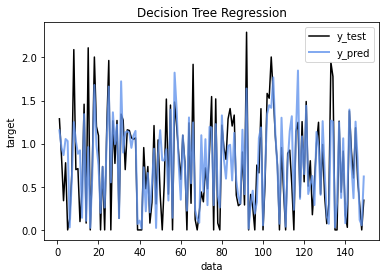

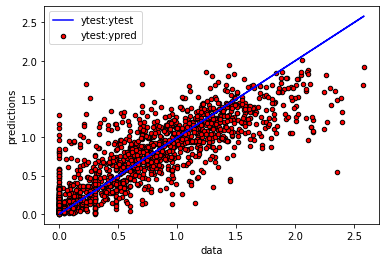

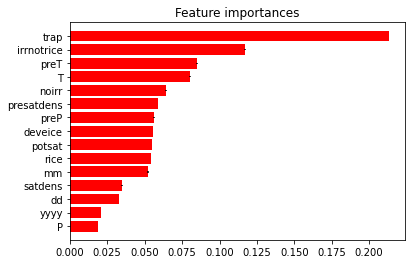

Feature ranking:
1. trap (0.213008)
2. irrnotrice (0.117251)
3. preT (0.085209)
4. T (0.080052)
5. noirr (0.064161)
6. presatdens (0.058872)
7. preP (0.056298)
8. deveice (0.055484)
9. potsat (0.054846)
10. rice (0.054347)
11. mm (0.052200)
12. satdens (0.035178)
13. dd (0.032834)
14. yyyy (0.021128)
15. P (0.019133)


In [23]:
##Random forest regression of middle counties and validation
regr = RandomForestRegressor(min_samples_leaf=1) 
regr.fit(m_xtrain,np.ravel(m_ytrain))
m_pred = regr.predict(m_xtest)
print("RMSE for rf regression:",np.sqrt(np.mean((m_ytest-m_pred)**2)))
# Plot the results for sample tests
plt.figure()
X=np.arange(m_ytest.shape[0])
plt.plot(X[1:150], m_ytest[1:150], color="black",
            label="y_test")
plt.plot(X[1:150], m_pred[1:150], color="cornflowerblue",
         label="y_pred", linewidth=2,alpha=0.8)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()
#Visualize fit
plt.plot(m_ytest,m_ytest,c="blue", label="ytest:ytest")
plt.scatter(m_ytest, m_pred, s=20, edgecolor="black",c="red", label="ytest:ypred")
plt.xlabel("data")
plt.ylabel("predictions")
plt.legend()
plt.show
#Feature ranking for southern counties
## Prediction Feature Ranking
# importance is calculated for each feature (predictor)

importances = regr.feature_importances_

std = np.std([tree.feature_importances_ for tree in regr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Plot the impurity-based feature importances of the forest

plt.figure()
plt.title("Feature importances")
plt.barh(range(m_xtrain.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.yticks(range(m_xtrain.shape[1]), mdf.drop(['county','numpertraps','log_num'],axis=1).columns[indices])
plt.ylim([-1, m_xtrain.shape[1]])
plt.gca().invert_yaxis()
plt.show()
# Print the feature ranking
print("Feature ranking:")

for f in range(m_xtrain.shape[1]):
    print("%d. %s (%f)" % (f + 1, mdf.drop(['county','numpertraps','log_num'],axis=1).columns[indices[f]], importances[indices[f]]))

Again, a smaller RMSE than the three-region together one is found, indicating that our grouping is potentially useful, the scatterplot share similar bias and spread as the three-region together one. Feature ranking are overall similar.

Then we took another look at the south y data. We discovered that there are many non-zero log_num values, but much less than the previous two regions. We do further analysis in the sdf.

In [24]:
s_y=sdf['log_num'].values
print(np.histogram(s_y))
s_x=sdf.drop(['county','numpertraps','log_num'],axis=1).values
s_y = s_y.reshape(-1,1)
test_size = 0.3
s_xtrain, s_xtest, s_ytrain, s_ytest = train_test_split(s_x, s_y, test_size=test_size, random_state=11)

(array([7439,  222,  211,  189,  150,   84,   27,    1,    4,    2],
      dtype=int64), array([0.        , 0.31708482, 0.63416964, 0.95125446, 1.26833928,
       1.5854241 , 1.90250892, 2.21959374, 2.53667856, 2.85376338,
       3.1708482 ]))


RMSE for rf regression: 0.42158110726186643
100


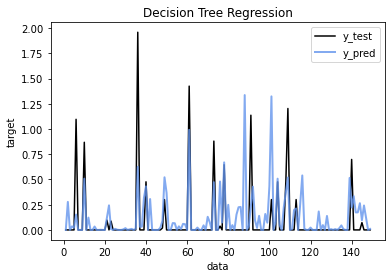

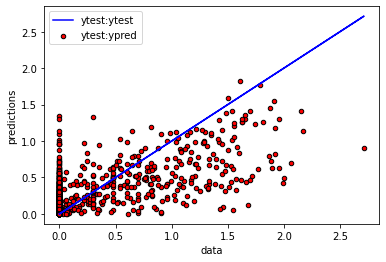

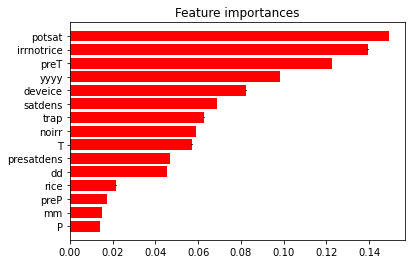

Feature ranking:
1. potsat (0.149127)
2. irrnotrice (0.139292)
3. preT (0.122393)
4. yyyy (0.098463)
5. deveice (0.082615)
6. satdens (0.068774)
7. trap (0.062787)
8. noirr (0.058848)
9. T (0.057171)
10. presatdens (0.047036)
11. dd (0.045301)
12. rice (0.021733)
13. preP (0.017552)
14. mm (0.014995)
15. P (0.013912)


In [25]:
##Random forest regression of southern counties and validation
regr = RandomForestRegressor(min_samples_leaf=1) 
regr.fit(s_xtrain,np.ravel(s_ytrain))
# Make a prediction of y, using X, see what the r-squared is
s_pred = regr.predict(s_xtest)
# Show the predicted error in RMSE
print("RMSE for rf regression:",np.sqrt(np.mean((s_ytest-s_pred)**2)))
# See how any tree from this forest looks 
estimator = regr.estimators_
print(len(estimator))
# Plot the results for sample tests
plt.figure()
X=np.arange(s_ytest.shape[0])
plt.plot(X[1:150], s_ytest[1:150], color="black",
            label="y_test")
plt.plot(X[1:150], s_pred[1:150], color="cornflowerblue",
         label="y_pred", linewidth=2,alpha=0.8)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()
#Visualize fit
plt.plot(s_ytest,s_ytest,c="blue", label="ytest:ytest")
plt.scatter(s_ytest, s_pred, s=20, edgecolor="black",c="red", label="ytest:ypred")
plt.xlabel("data")
plt.ylabel("predictions")
plt.legend()
plt.show
#Feature ranking for southern counties
## Prediction Feature Ranking
# importance is calculated for each feature (predictor)

importances = regr.feature_importances_

std = np.std([tree.feature_importances_ for tree in regr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.barh(range(s_xtrain.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.yticks(range(s_xtrain.shape[1]), sdf.drop(['county','numpertraps','log_num'],axis=1).columns[indices])
plt.ylim([-1, s_xtrain.shape[1]])
plt.gca().invert_yaxis()
plt.show()
# Print the feature ranking
print("Feature ranking:")

for f in range(s_xtrain.shape[1]):
    print("%d. %s (%f)" % (f + 1, sdf.drop(['county','numpertraps','log_num'],axis=1).columns[indices[f]], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest

We discovered that the RMSE smaller than before, but scatterplot suggests significantly underestimation of log_num for the region. We further plot training scatterplot to check the bias below.

<function matplotlib.pyplot.show(*args, **kw)>

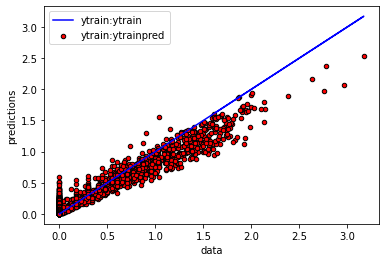

In [26]:
#Visualize fit
plt.plot(s_ytrain,s_ytrain,c="blue", label="ytrain:ytrain")
s_trainpred = regr.predict(s_xtrain)
plt.scatter(s_ytrain, s_trainpred, s=20, edgecolor="black",c="red", label="ytrain:ytrainpred")
plt.xlabel("data")
plt.ylabel("predictions")
plt.legend()
plt.show

Again, we found the significant underestimation for the south region. This indicates that we might need to have a more sophisticated model or more predictors to better predicting the log_num.

Now we discovered that the model tends to behave better (in terms of over/underestimation) in north and middle regions for the abundance of pipiens, and tends to underpredict abundance in south regions, presumably because less available positive training data.
Saturation density still have a higher importance than precipitation, indicating that saturation density is a better predictor of the results. To better check which county contributes to the systematically underestimation in the south region, we further look into the five counties one by one.

### County 1: Madera

In [37]:
south=('Madera','Fresno','Kings','Tulare','Kern')
pipiensnew = pd.read_csv('finalproject/pipienslist.csv')
df = pd.DataFrame([])
df = pipiensnew[pipiensnew['county'].str.contains(south[0])]
df.trap.replace(('NJLT', 'GRVD', 'CO2'),(1, 2, 3),inplace=True)
df.county.replace(south,(1,2,3,4,5),inplace=True)
df['log_num'] = np.log10(df['numpertraps']+1) # Plus 1 to avoid inf
s_y=df['log_num'].values
#print(np.histogram(s_y)) #Used for check the five counties' histogram of log_num, and discovered that all 5 of them have many non-zero log_nums
s_x=df.drop(['county','numpertraps','log_num'],axis=1).values
s_y = s_y.reshape(-1,1)
test_size = 0.3
s_xtrain, s_xtest, s_ytrain, s_ytest = train_test_split(s_x, s_y, test_size=test_size, random_state=11)

C:\Users\BANZH\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-37-d3fa1bcbe31f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_num'] = np.log10(df['numpertraps']+1) # Plus 1 to avoid inf


RMSE for rf regression: 0.276342081822239
100


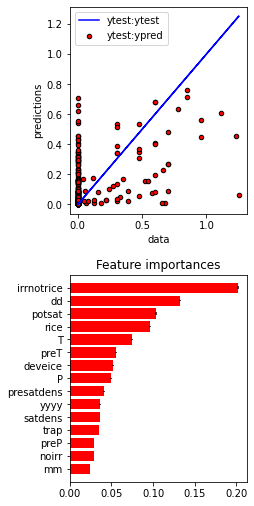

In [38]:
##Random forest regression of southern counties and validation
regr = RandomForestRegressor(min_samples_leaf=1) 
regr.fit(s_xtrain,np.ravel(s_ytrain))
s_pred = regr.predict(s_xtest)
print("RMSE for rf regression:",np.sqrt(np.mean((s_ytest-s_pred)**2)))
estimator = regr.estimators_
print(len(estimator))
fig, axs = plt.subplots(2,figsize=(4,8))
fig.tight_layout(pad=4.0)
#Visualize fit
axs[0].plot(s_ytest,s_ytest,c="blue", label="ytest:ytest")
axs[0].scatter(s_ytest, s_pred, s=20, edgecolor="black",c="red", label="ytest:ypred")
axs[0].set(xlabel='data',ylabel='predictions')
axs[0].legend()
#Feature ranking for southern counties
importances = regr.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
axs[1].set_title("Feature importances")
axs[1].barh(range(s_xtrain.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
axs[1].set_ylim([-1, s_xtrain.shape[1]])
axs[1].set_yticks(range(s_xtrain.shape[1]))
axs[1].set_yticklabels(df.drop(['county','numpertraps','log_num'],axis=1).columns[indices])
axs[1].invert_yaxis()
plt.show()

### County 2: Fresno

In [39]:
south=('Madera','Fresno','Kings','Tulare','Kern')
pipiensnew = pd.read_csv('finalproject/pipienslist.csv')
df = pd.DataFrame([])
df = pipiensnew[pipiensnew['county'].str.contains(south[1])]
df.trap.replace(('NJLT', 'GRVD', 'CO2'),(1, 2, 3),inplace=True)
df.county.replace(south,(1,2,3,4,5),inplace=True)
df['log_num'] = np.log10(df['numpertraps']+1) # Plus 1 to avoid inf
s_y=df['log_num'].values
#print(np.histogram(s_y)) #Used for check the five counties' histogram of log_num, and discovered that all 5 of them have many non-zero log_nums
s_x=df.drop(['county','numpertraps','log_num'],axis=1).values
s_y = s_y.reshape(-1,1)
test_size = 0.3
s_xtrain, s_xtest, s_ytrain, s_ytest = train_test_split(s_x, s_y, test_size=test_size, random_state=11)

C:\Users\BANZH\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-39-85a0cc0db376>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_num'] = np.log10(df['numpertraps']+1) # Plus 1 to avoid inf


RMSE for rf regression: 0.1723550546795153
100


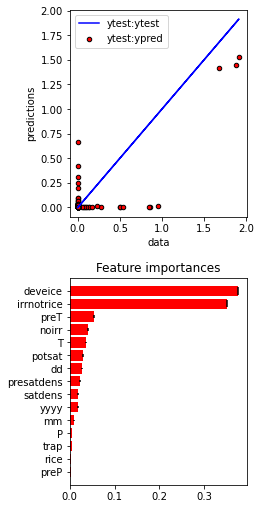

In [40]:
##Random forest regression of southern counties and validation
regr = RandomForestRegressor(min_samples_leaf=1) 
regr.fit(s_xtrain,np.ravel(s_ytrain))
s_pred = regr.predict(s_xtest)
print("RMSE for rf regression:",np.sqrt(np.mean((s_ytest-s_pred)**2)))
estimator = regr.estimators_
print(len(estimator))
fig, axs = plt.subplots(2,figsize=(4,8))
fig.tight_layout(pad=4.0)
#Visualize fit
axs[0].plot(s_ytest,s_ytest,c="blue", label="ytest:ytest")
axs[0].scatter(s_ytest, s_pred, s=20, edgecolor="black",c="red", label="ytest:ypred")
axs[0].set(xlabel='data',ylabel='predictions')
axs[0].legend()
#Feature ranking for southern counties
importances = regr.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
axs[1].set_title("Feature importances")
axs[1].barh(range(s_xtrain.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
axs[1].set_ylim([-1, s_xtrain.shape[1]])
axs[1].set_yticks(range(s_xtrain.shape[1]))
axs[1].set_yticklabels(df.drop(['county','numpertraps','log_num'],axis=1).columns[indices])
axs[1].invert_yaxis()
plt.show()

### County 3: Kings

In [41]:
south=('Madera','Fresno','Kings','Tulare','Kern')
pipiensnew = pd.read_csv('finalproject/pipienslist.csv')
df = pd.DataFrame([])
df = pipiensnew[pipiensnew['county'].str.contains(south[2])]
df.trap.replace(('NJLT', 'GRVD', 'CO2'),(1, 2, 3),inplace=True)
df.county.replace(south,(1,2,3,4,5),inplace=True)
df['log_num'] = np.log10(df['numpertraps']+1) # Plus 1 to avoid inf
s_y=df['log_num'].values
#print(np.histogram(s_y)) #Used for check the five counties' histogram of log_num, and discovered that all 5 of them have many non-zero log_nums
s_x=df.drop(['county','numpertraps','log_num'],axis=1).values
s_y = s_y.reshape(-1,1)
test_size = 0.3
s_xtrain, s_xtest, s_ytrain, s_ytest = train_test_split(s_x, s_y, test_size=test_size, random_state=11)

C:\Users\BANZH\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-41-53e18233317f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_num'] = np.log10(df['numpertraps']+1) # Plus 1 to avoid inf


RMSE for rf regression: 0.811770295880432
100


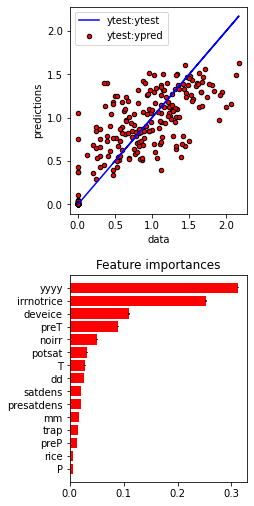

In [42]:
##Random forest regression of southern counties and validation
regr = RandomForestRegressor(min_samples_leaf=1) 
regr.fit(s_xtrain,np.ravel(s_ytrain))
s_pred = regr.predict(s_xtest)
print("RMSE for rf regression:",np.sqrt(np.mean((s_ytest-s_pred)**2)))
estimator = regr.estimators_
print(len(estimator))
fig, axs = plt.subplots(2,figsize=(4,8))
fig.tight_layout(pad=4.0)
#Visualize fit
axs[0].plot(s_ytest,s_ytest,c="blue", label="ytest:ytest")
axs[0].scatter(s_ytest, s_pred, s=20, edgecolor="black",c="red", label="ytest:ypred")
axs[0].set(xlabel='data',ylabel='predictions')
axs[0].legend()
#Feature ranking for southern counties
importances = regr.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
axs[1].set_title("Feature importances")
axs[1].barh(range(s_xtrain.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
axs[1].set_ylim([-1, s_xtrain.shape[1]])
axs[1].set_yticks(range(s_xtrain.shape[1]))
axs[1].set_yticklabels(df.drop(['county','numpertraps','log_num'],axis=1).columns[indices])
axs[1].invert_yaxis()
plt.show()

### County 4: Tulare

In [43]:
south=('Madera','Fresno','Kings','Tulare','Kern')
pipiensnew = pd.read_csv('finalproject/pipienslist.csv')
df = pd.DataFrame([])
df = pipiensnew[pipiensnew['county'].str.contains(south[3])]
df.trap.replace(('NJLT', 'GRVD', 'CO2'),(1, 2, 3),inplace=True)
df.county.replace(south,(1,2,3,4,5),inplace=True)
df['log_num'] = np.log10(df['numpertraps']+1) # Plus 1 to avoid inf
s_y=df['log_num'].values
#print(np.histogram(s_y)) #Used for check the five counties' histogram of log_num, and discovered that all 5 of them have many non-zero log_nums
s_x=df.drop(['county','numpertraps','log_num'],axis=1).values
s_y = s_y.reshape(-1,1)
test_size = 0.3
s_xtrain, s_xtest, s_ytrain, s_ytest = train_test_split(s_x, s_y, test_size=test_size, random_state=11)

C:\Users\BANZH\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-43-eb5d6f6acccb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_num'] = np.log10(df['numpertraps']+1) # Plus 1 to avoid inf


RMSE for rf regression: 0.516004845316658
100


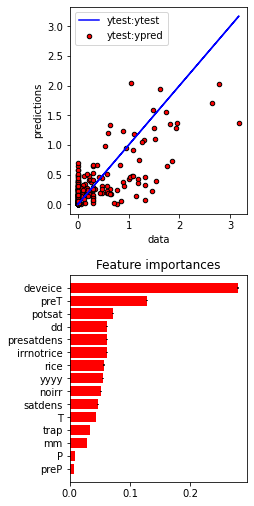

In [44]:
##Random forest regression of southern counties and validation
regr = RandomForestRegressor(min_samples_leaf=1) 
regr.fit(s_xtrain,np.ravel(s_ytrain))
s_pred = regr.predict(s_xtest)
print("RMSE for rf regression:",np.sqrt(np.mean((s_ytest-s_pred)**2)))
estimator = regr.estimators_
print(len(estimator))
fig, axs = plt.subplots(2,figsize=(4,8))
fig.tight_layout(pad=4.0)
#Visualize fit
axs[0].plot(s_ytest,s_ytest,c="blue", label="ytest:ytest")
axs[0].scatter(s_ytest, s_pred, s=20, edgecolor="black",c="red", label="ytest:ypred")
axs[0].set(xlabel='data',ylabel='predictions')
axs[0].legend()
#Feature ranking for southern counties
importances = regr.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
axs[1].set_title("Feature importances")
axs[1].barh(range(s_xtrain.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
axs[1].set_ylim([-1, s_xtrain.shape[1]])
axs[1].set_yticks(range(s_xtrain.shape[1]))
axs[1].set_yticklabels(df.drop(['county','numpertraps','log_num'],axis=1).columns[indices])
axs[1].invert_yaxis()
plt.show()

### County 5: Kern

In [45]:
south=('Madera','Fresno','Kings','Tulare','Kern')
pipiensnew = pd.read_csv('finalproject/pipienslist.csv')
df = pd.DataFrame([])
df = pipiensnew[pipiensnew['county'].str.contains(south[4])]
df.trap.replace(('NJLT', 'GRVD', 'CO2'),(1, 2, 3),inplace=True)
df.county.replace(south,(1,2,3,4,5),inplace=True)
df['log_num'] = np.log10(df['numpertraps']+1) # Plus 1 to avoid inf
s_y=df['log_num'].values
#print(np.histogram(s_y)) #Used for check the five counties' histogram of log_num, and discovered that all 5 of them have many non-zero log_nums
s_x=df.drop(['county','numpertraps','log_num'],axis=1).values
s_y = s_y.reshape(-1,1)
test_size = 0.3
s_xtrain, s_xtest, s_ytrain, s_ytest = train_test_split(s_x, s_y, test_size=test_size, random_state=11)

C:\Users\BANZH\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-45-bf24526fb721>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_num'] = np.log10(df['numpertraps']+1) # Plus 1 to avoid inf


RMSE for rf regression: 0.07153844361805652
100


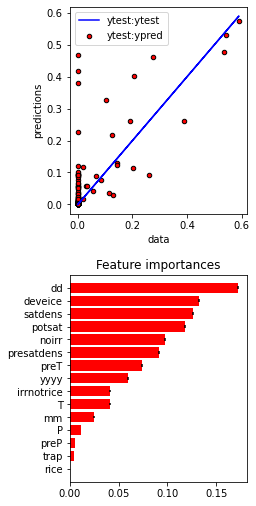

In [46]:
##Random forest regression of southern counties and validation
regr = RandomForestRegressor(min_samples_leaf=1) 
regr.fit(s_xtrain,np.ravel(s_ytrain))
s_pred = regr.predict(s_xtest)
print("RMSE for rf regression:",np.sqrt(np.mean((s_ytest-s_pred)**2)))
estimator = regr.estimators_
print(len(estimator))
fig, axs = plt.subplots(2,figsize=(4,8))
fig.tight_layout(pad=4.0)
#Visualize fit
axs[0].plot(s_ytest,s_ytest,c="blue", label="ytest:ytest")
axs[0].scatter(s_ytest, s_pred, s=20, edgecolor="black",c="red", label="ytest:ypred")
axs[0].set(xlabel='data',ylabel='predictions')
axs[0].legend()
#Feature ranking for southern counties
importances = regr.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
axs[1].set_title("Feature importances")
axs[1].barh(range(s_xtrain.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
axs[1].set_ylim([-1, s_xtrain.shape[1]])
axs[1].set_yticks(range(s_xtrain.shape[1]))
axs[1].set_yticklabels(df.drop(['county','numpertraps','log_num'],axis=1).columns[indices])
axs[1].invert_yaxis()
plt.show()

It seems that all five counties except the third one, Kings, have either very large spread or obvious systematic underestimation.
A common feature of the four counties are that they all have very few sampling points, this could potentially explain the bad performance of the model.